<a href="https://colab.research.google.com/github/elarchi2005/IA_2025/blob/main/Creditoscsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


%matplotlib inline
plt.rcParams['figure.figsize'] = (7,4)
sns.set(style='whitegrid')

In [13]:

df = pd.read_csv('/content/creditos.csv')
df.head()

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0


In [14]:

print('Filas, columnas:', df.shape)
print('Tipos de dato:')
print(df.dtypes)
print('Valores nulos por columna:')
print(df.isnull().sum())

Filas, columnas: (200, 3)
Tipos de dato:
edad       int64
credito    int64
cumplio    int64
dtype: object
Valores nulos por columna:
edad       0
credito    0
cumplio    0
dtype: int64


In [15]:
# Seleccionar variables (ajusta si los nombres son distintos)
# Asumimos que las columnas se llaman 'edad', 'credito' y 'cumplio'
X = df[['edad','credito']].copy()
y = df['cumplio'].copy()

# Revisar resumen estadístico
X.describe().round(2)

,edad,credito
count,200.00,200.00
mean,37.28,289946.67
std,9.15,137945.59
min,18.00,100000.00
25%,29.00,172966.50
50%,37.50,276234.00
75%,45.00,394574.50
max,57.00,596771.00


In [16]:
# Escalado y división en train/test
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

print('Train:', X_train.shape, 'Test:', X_test.shape)

Train: (140, 2) Test: (60, 2)


In [22]:

metrics = [
    ('euclidean', {}),
    ('manhattan', {'p':1}),
    ('minkowski', {'p':3}),
    ('chebyshev', {})
]

results = []
for name, params in metrics:

    if name == 'minkowski':
        clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=params['p'])
    else:
        clf = KNeighborsClassifier(n_neighbors=5, metric=name)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc, clf, y_pred))


res_df = pd.DataFrame([(r[0], r[1]) for r in results], columns=['metric','accuracy']).sort_values(by='accuracy', ascending=False)
res_df.round(3)

,metric,accuracy
3,chebyshev,0.850
2,minkowski,0.850
0,euclidean,0.833
1,manhattan,0.817


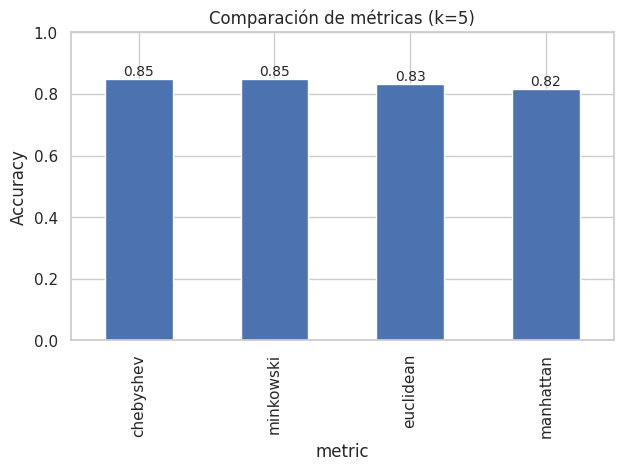

In [23]:

ax = res_df.set_index('metric')['accuracy'].plot(kind='bar', legend=False)
ax.set_ylabel('Accuracy')
ax.set_ylim(0,1)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.title('Comparación de métricas (k=5)')
plt.show()


--- Métrica: euclidean  | Accuracy: 0.833
Matriz de confusión:
 [[ 3  7]
 [ 3 47]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.50      0.30      0.38        10
           1       0.87      0.94      0.90        50

    accuracy                           0.83        60
   macro avg       0.69      0.62      0.64        60
weighted avg       0.81      0.83      0.82        60



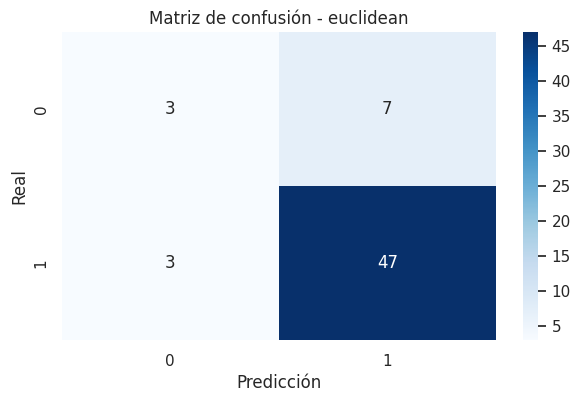


--- Métrica: manhattan  | Accuracy: 0.817
Matriz de confusión:
 [[ 2  8]
 [ 3 47]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.40      0.20      0.27        10
           1       0.85      0.94      0.90        50

    accuracy                           0.82        60
   macro avg       0.63      0.57      0.58        60
weighted avg       0.78      0.82      0.79        60



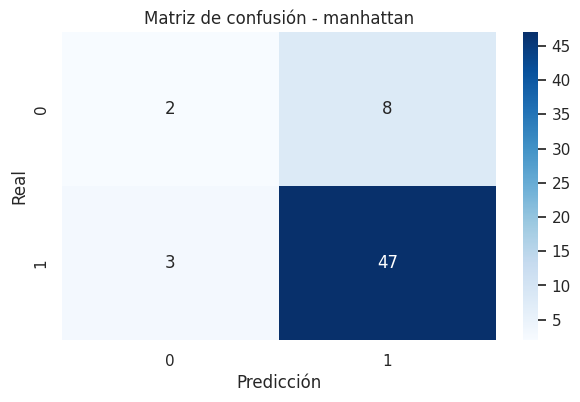


--- Métrica: minkowski  | Accuracy: 0.85
Matriz de confusión:
 [[ 2  8]
 [ 1 49]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.67      0.20      0.31        10
           1       0.86      0.98      0.92        50

    accuracy                           0.85        60
   macro avg       0.76      0.59      0.61        60
weighted avg       0.83      0.85      0.81        60



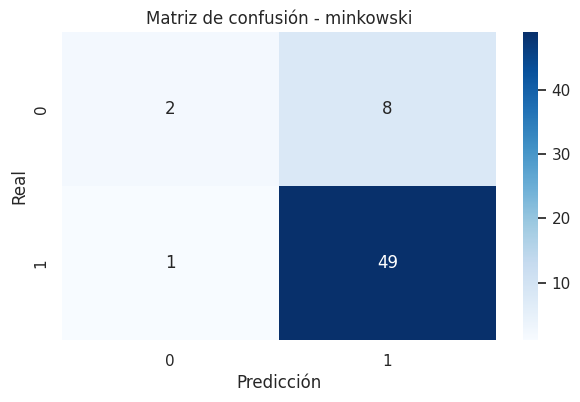


--- Métrica: chebyshev  | Accuracy: 0.85
Matriz de confusión:
 [[ 2  8]
 [ 1 49]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.67      0.20      0.31        10
           1       0.86      0.98      0.92        50

    accuracy                           0.85        60
   macro avg       0.76      0.59      0.61        60
weighted avg       0.83      0.85      0.81        60



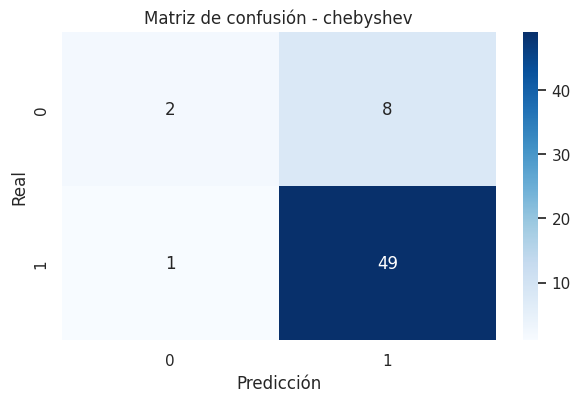

In [24]:
for name, acc, clf, y_pred in results:
    print('\n--- Métrica:', name, ' | Accuracy:', round(acc, 3))
    cm = confusion_matrix(y_test, y_pred)
    print('Matriz de confusión:\n', cm)
    print('\nReporte de clasificación:\n', classification_report(y_test, y_pred, zero_division=0))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de confusión - {name}')
    plt.show()

In [25]:

best_metric = res_df.iloc[0]['metric']
best_acc = res_df.iloc[0]['accuracy']
print('Mejor métrica (k=5):', best_metric, ' con accuracy=', round(best_acc,3))
k_values = [1,3,5,7,11, int(np.sqrt(len(df))) if int(np.sqrt(len(df)))%2==1 else int(np.sqrt(len(df)))+1]
k_values = sorted(list(set(k_values)))
scores = []
for k in k_values:
    if best_metric == 'minkowski':
        clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=3)
    else:
        clf = KNeighborsClassifier(n_neighbors=k, metric=best_metric)
    clf.fit(X_train, y_train)
    scores.append((k, accuracy_score(y_test, clf.predict(X_test))))

scores_df = pd.DataFrame(scores, columns=['k','accuracy']).set_index('k')
scores_df.round(3)

Mejor métrica (k=5): chebyshev  con accuracy= 0.85


,accuracy
k,
1,0.817
3,0.833
5,0.850
7,0.850
11,0.833
15,0.833


In [ ]:

ax = scores_df['accuracy'].plot(marker='o')
ax.set_xlabel('k (vecinos)')
ax.set_ylabel('Accuracy')
ax.set_ylim(0,1)
for x,y in scores_df.itertuples():
    plt.text(x, y+0.01, f"{y:.2f}", ha='center')
plt.title(f'Accuracy vs k (métrica: {best_metric})')
plt.grid(True)
plt.show()

## Conclusiones

- Se compararon varias métricas de distancia con KNN (k=5). La métrica con mayor accuracy en test se seleccionó como la mejor.

- Cambiando `k` observamos cómo varía el accuracy; valores pequeños de `k` pueden sobreajustar y valores grandes suavizan la frontera.

